In [11]:
%matplotlib inline

In [12]:
import numpy as np
import group_lasso_cv as glcv # Import the custom module

In [13]:
# --- Step 1: Simulate or Load Data ---
# For this demonstration, we use the simulation function from our module.
# In a real-world scenario, you would replace this with your data loading code.
df, group_labels = glcv.simulate_fmri_data(n_subs=100, n_features=50, n_groups=5)

Step 1: Simulating fMRI data...
   - Created DataFrame with shape: (100, 51)
------------------------------


In [14]:
# --- [Cell 3] Step 2: Prepare Data for the Model ---
# This converts the DataFrame into the required format for the model.
X, y, groups = glcv.prepare_group_lasso_data(df, group_labels, target_col='depression')


Step 2: Preparing data and group structure...
   - Converted group dictionary to a numerical array of length 50.
------------------------------


In [15]:
# --- [Cell 4] Step 3: Define Hyperparameter Search Space ---
# Define the range of regularization strengths to test.
param_grid = {
    'group_reg': np.logspace(-2, 1, 10) # 10 values from 0.01 to 10
}
print("Step 3: Hyperparameter grid defined.")
print("-" * 30)

Step 3: Hyperparameter grid defined.
------------------------------


In [16]:
# %%
# --- [Cell 5] Step 4: Run Hold-Out Evaluation ---
# This function splits data into a train/test set, finds the best hyperparameters
# on the train set using CV, and evaluates the final model on the hold-out test set.
final_model, preprocessor, report, eval_data = glcv.run_holdout_evaluation(
    X, y, groups, param_grid, test_size=0.25 # Use 25% of data for the final test
)

# Unpack the evaluation data for plotting
y_test, y_pred, y_pred_proba = eval_data

Step 4: Running Hold-Out Evaluation...
   - Data split into 75 training samples and 25 test samples.
   - Scaler fitted on training data and applied to both sets.
   - Tuning hyperparameters with GridSearchCV on the training data...
   - Best hyperparameter found: {'group_reg': 0.021544346900318832}
   - Best CV score on training data: 0.8385
   - Evaluating final model on the hold-out test set.


In [17]:
# %%
# --- [Cell 6] Step 5: Display Final Performance on Test Set ---
print("\n" + "-" * 30)
print("Step 5: Final Model Performance on Hold-Out Test Set")
print("\nPerformance Report:")
for metric, value in report.items():
    print(f"   - {metric}: {value:.4f}")

# Get and print the feature groups selected by the final model
selected_groups = glcv.get_selected_groups(final_model, groups, group_labels)
print("\nSelected Feature Groups:")
if selected_groups:
    for group_name in selected_groups:
        print(f"   - {group_name}")
else:
    print("   - No groups were selected (all coefficients are zero).")



------------------------------
Step 5: Final Model Performance on Hold-Out Test Set

Performance Report:
   - Accuracy: 0.6400
   - Precision: 0.7500
   - Recall: 0.2727
   - F1-Score: 0.4000
   - ROC AUC: 0.9091

Selected Feature Groups:
   - Group_3



------------------------------
Step 5: Final Model Performance on Hold-Out Test Set

Performance Report:
   - Accuracy: 0.6400
   - Precision: 0.7500
   - Recall: 0.2727
   - F1-Score: 0.4000
   - ROC AUC: 0.9091

Selected Feature Groups:
   - Group_3

Displaying Confusion Matrix...


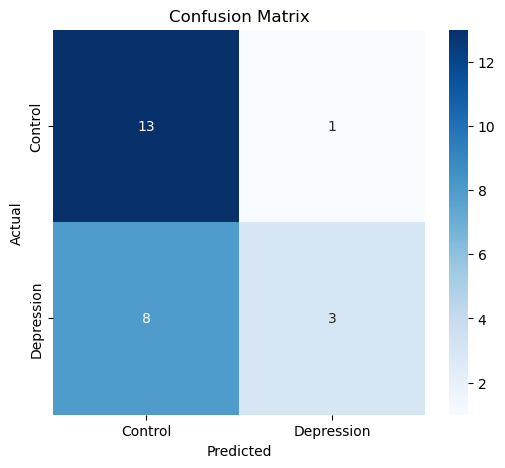


Displaying ROC Curve...


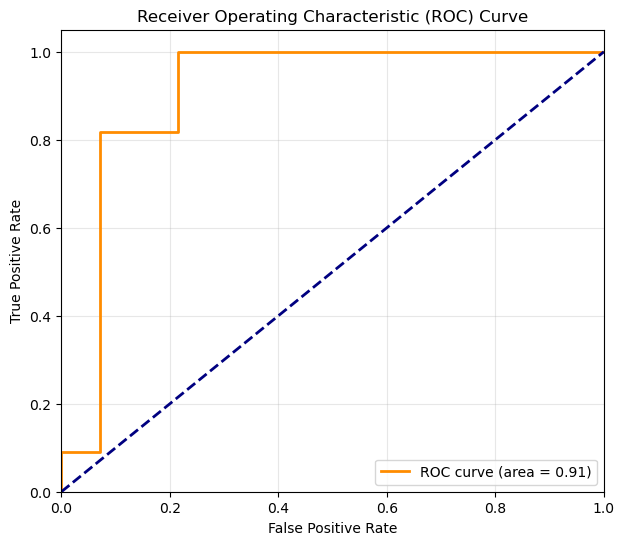


------------------------------
Analysis complete.


In [18]:
# %%
# --- [Cell 6] Step 5: Display Final Performance on Test Set ---
print("\n" + "-" * 30)
print("Step 5: Final Model Performance on Hold-Out Test Set")
print("\nPerformance Report:")
for metric, value in report.items():
    print(f"   - {metric}: {value:.4f}")

# Get and print the feature groups selected by the final model
selected_groups = glcv.get_selected_groups(final_model, groups, group_labels)
print("\nSelected Feature Groups:")
if selected_groups:
    for group_name in selected_groups:
        print(f"   - {group_name}")
else:
    print("   - No groups were selected (all coefficients are zero).")


# %%
# --- [Cell 7] Step 6: Visualize Final Model Performance ---

# Plot the confusion matrix using the actual vs. predicted values from the test set
print("\nDisplaying Confusion Matrix...")
glcv.plot_confusion_matrix(y_test, y_pred, class_names=['Control', 'Depression'])

# Plot the ROC curve using the probabilities from the test set
print("\nDisplaying ROC Curve...")
glcv.plot_roc_curve(y_test, y_pred_proba)

print("\n" + "-" * 30)
print("Analysis complete.")
